## Analisis de Reviews de Transporte en Tenerife

In [38]:
import pandas as pd
from textblob import TextBlob
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models
pd.set_option('display.max_columns', 100)

### Lectura de datos

In [5]:
guaguas_df = pd.read_csv('data/guagua_reviews.csv')
tranvia_df = pd.read_csv('data/tranvia_reviews.csv')
alquiler_df = pd.read_csv('data/alquila_autos_reviews.csv')

### Guaguas (Autobús)
#### Información sobre el scrapping:
* Ubicación: Tenerife, España
* String de búsqueda: "paradas de guaguas"
* Número Máximo de resultados de la búsqueda: 500 
* Número Máximo de reviews por cada resultado: 50
* Orden: Más Relevantes (Para obtener la mayor cantidad posible de reviews donde "text" no sea nulo)

In [6]:
guaguas_df.shape

(2299, 53)

In [39]:
guaguas_df.head()

,title,stars,text,likesCount,name,reviewerNumberOfReviews,isLocalGuide,responseFromOwnerDate,responseFromOwnerText,publishAt,rating,reviewId,reviewImageUrls/0,reviewImageUrls/1,reviewImageUrls/2,reviewImageUrls/3,reviewImageUrls/4,reviewImageUrls/5,reviewImageUrls/6,reviewImageUrls/7,reviewImageUrls/8,reviewImageUrls/9,reviewImageUrls/10,reviewImageUrls/11,reviewImageUrls/12,reviewImageUrls/13,reviewImageUrls/14,reviewImageUrls/15,reviewImageUrls/16,reviewImageUrls/17,reviewImageUrls/18,reviewImageUrls/19,reviewImageUrls/20,reviewImageUrls/21,reviewImageUrls/22,reviewImageUrls/23,reviewImageUrls/24,reviewImageUrls/25,reviewImageUrls/26,reviewImageUrls/27,reviewImageUrls/28,reviewImageUrls/29,reviewImageUrls/30,reviewImageUrls/31,reviewImageUrls/32,reviewImageUrls/33,reviewOrigin,reviewUrl,reviewerId,reviewerPhotoUrl,reviewerUrl,textTranslated,sentiment,sentiment_label
publishedAtDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-02-16 13:37:14.947000+00:00,Cuesta la Villa,4,NaN,0,Marco Antonio Pérez Arbelo,NaN,True,NaN,NaN,Hace un año,NaN,ChdDSUhNMG9nS0VJQ0FnSUNoNmFDVzRnRRAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,https://www.google.com/maps/reviews/data=!4m8!...,114859417135057651419,https://lh3.googleusercontent.com/a-/ALV-UjWIJ...,https://www.google.com/maps/contrib/1148594171...,NaN,NaN,neutral
2020-10-04 17:52:00.289000+00:00,Cuesta la Villa,5,NaN,0,Marvin Yanez,NaN,True,NaN,NaN,Hace 3 años,NaN,ChZDSUhNMG9nS0VJQ0FnSURDcGFXTlhREAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,https://www.google.com/maps/reviews/data=!4m8!...,108022632841578032678,https://lh3.googleusercontent.com/a-/ALV-UjVcF...,https://www.google.com/maps/contrib/1080226328...,NaN,NaN,neutral
2023-04-21 13:47:09.788000+00:00,El Lagar (T),5,Pasan las guaguas 012. 101 .,0,RICARDO PRIETO,NaN,True,NaN,NaN,Hace un año,NaN,ChdDSUhNMG9nS0VJQ0FnSURSa3JTdF9nRRAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,https://www.google.com/maps/reviews/data=!4m8!...,114574440006453548934,https://lh3.googleusercontent.com/a-/ALV-UjUC4...,https://www.google.com/maps/contrib/1145744400...,NaN,0.0,neutral
2020-09-06 20:30:36.293000+00:00,El Lagar (T),3,NaN,0,Ramona Garcia,NaN,True,NaN,NaN,Hace 3 años,NaN,ChZDSUhNMG9nS0VJQ0FnSUNDbF83WmRnEAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,https://www.google.com/maps/reviews/data=!4m8!...,103430837156041461912,https://lh3.googleusercontent.com/a-/ALV-UjXK2...,https://www.google.com/maps/contrib/1034308371...,NaN,NaN,neutral
2024-03-17 18:52:24.855000+00:00,Puerto de la Cruz,5,Muy bonito y turístico,0,El Zambito,NaN,True,NaN,NaN,Hace 4 meses,NaN,ChdDSUhNMG9nS0VJQ0FnSUQ5a2VqX3lRRRAB,https://lh5.googleusercontent.com/p/AF1QipNFNT...,https://lh5.googleusercontent.com/p/AF1QipP0fw...,https://lh5.googleusercontent.com/p/AF1QipOF0c...,https://lh5.googleusercontent.com/p/AF1QipO5_4...,https://lh5.googleusercontent.com/p/AF1QipPLb7...,https://lh5.googleusercontent.com/p/AF1QipO3X_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,https://www.google.com/maps/reviews/data=!4m8!...,110710957523244403173,https://lh3.googleusercontent.com/a-/ALV-UjXke...,https://www.google.com/maps/contrib/1107109575...,NaN,0.0,neutral


In [7]:
guaguas_df.describe()

,stars,likesCount,reviewerNumberOfReviews,responseFromOwnerDate,responseFromOwnerText,rating
count,2299.000000,2299.000000,0.0,0.0,0.0,0.0
mean,3.953023,0.379295,NaN,NaN,NaN,NaN
std,1.396397,1.214801,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,3.000000,0.000000,NaN,NaN,NaN,NaN
50%,5.000000,0.000000,NaN,NaN,NaN,NaN
75%,5.000000,0.000000,NaN,NaN,NaN,NaN
max,5.000000,27.000000,NaN,NaN,NaN,NaN


In [11]:
guaguas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    2299 non-null   object 
 1   stars                    2299 non-null   int64  
 2   text                     1629 non-null   object 
 3   publishedAtDate          2299 non-null   object 
 4   likesCount               2299 non-null   int64  
 5   name                     2299 non-null   object 
 6   reviewerNumberOfReviews  0 non-null      float64
 7   isLocalGuide             2299 non-null   bool   
 8   responseFromOwnerDate    0 non-null      float64
 9   responseFromOwnerText    0 non-null      float64
 10  publishAt                2299 non-null   object 
 11  rating                   0 non-null      float64
 12  reviewId                 2299 non-null   object 
 13  reviewImageUrls/0        234 non-null    object 
 14  reviewImageUrls/1       

#### Análisis de Sentimiento 
#### ¿Cuál es el sentimiento general de los comentarios sobre las paradas de guaguas en Tenerife?

In [14]:
guaguas_df['sentiment'] = guaguas_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else None)
guaguas_df['sentiment_label'] = guaguas_df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
sentiment_summary = guaguas_df['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_summary)


sentiment_label
neutral     86.733362
positive    11.309265
negative     1.957373
Name: proportion, dtype: float64


#### Frecuencia de Palabras
#### ¿Cuáles son las palabras más mencionadas en los comentarios?

In [22]:
# Descargar las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Combina las stopwords con las palabras de menos de 4 letras
additional_stop_words = {'que', 'los', 'las', 'para', 'una', 'muy', 'con', 'guagua', 'guaguas','tenerife'}
all_stop_words = stop_words.union(additional_stop_words)

# Función para filtrar palabras
def filter_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [word for word in words if word not in all_stop_words and len(word) >= 4]

# Aplica la función a los comentarios
text_data = ' '.join(guaguas_df['text'].dropna())
filtered_words = filter_words(text_data)

# Calcula la frecuencia de palabras
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)
print(common_words)

[('bien', 120), ('lugar', 120), ('parada', 117), ('servicio', 112), ('playa', 110), ('estación', 106), ('cruz', 87), ('buena', 76), ('hora', 74), ('gente', 73), ('horarios', 61), ('buen', 59), ('información', 57), ('siempre', 56), ('mejor', 53), ('puerto', 52), ('sitio', 52), ('isla', 50), ('atención', 49), ('santa', 48)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilio_lopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Nube de palabras más comunes

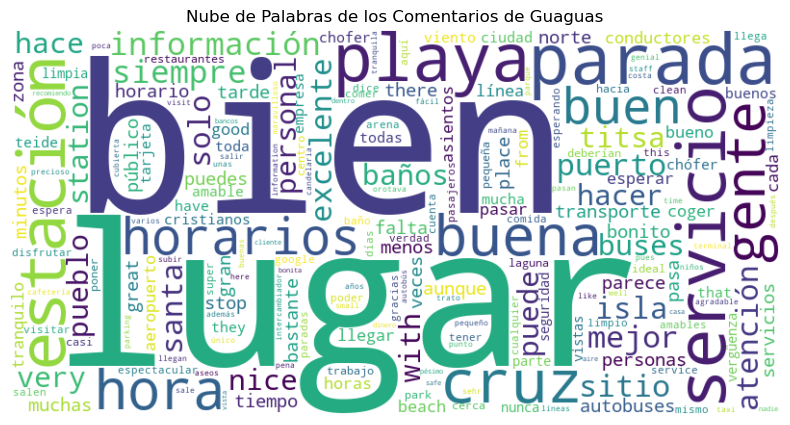

In [28]:
# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Comentarios de Guaguas')
plt.show()

#### Temas comunes en los comentarios

In [30]:
# Prepara los textos para el análisis de tópicos
texts = [filter_words(text) for text in guaguas_df['text'].dropna()]

# Crea el diccionario y el corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Aplica LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Muestra los tópicos
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.005*"lugar" + 0.005*"bonito" + 0.004*"pueblo" + 0.003*"servicio" + 0.003*"buen"')
(1, '0.009*"parada" + 0.007*"buen" + 0.006*"servicio" + 0.005*"lugar" + 0.004*"zona"')
(2, '0.006*"tenerife" + 0.006*"with" + 0.006*"guagua" + 0.006*"nice" + 0.006*"very"')
(3, '0.011*"guagua" + 0.011*"bien" + 0.007*"playa" + 0.006*"buena" + 0.005*"hora"')
(4, '0.011*"estación" + 0.009*"excelente" + 0.008*"lugar" + 0.006*"parada" + 0.006*"baños"')


#### Interpretación de Resultados
Para cada tópico, el modelo LDA te proporciona un conjunto de palabras con sus respectivas ponderaciones. Aquí tienes cómo interpretarlos:

* Tópico 0:
    * Palabras: "lugar", "bonito", "pueblo", "servicio", "buen"
    * Interpretación: Este tópico parece centrarse en la descripción de lugares y servicios, con un enfoque en la belleza del lugar (bonito, pueblo, buen servicio).

* Tópico 1:
    * Palabras: "parada", "buen", "servicio", "lugar", "zona"
    * Interpretación: Este tópico está relacionado con las paradas de autobús, destacando la calidad del servicio y la localización de las paradas (buen servicio, lugar, zona).

* Tópico 2:
    * Palabras: "tenerife", "with", "guagua", "nice", "very"
    * Interpretación: Este tópico mezcla inglés y español, probablemente comentarios de turistas, con un enfoque en la experiencia general en Tenerife y la calidad del servicio de guaguas (Tenerife, guagua, nice, very).

* Tópico 3:
    * Palabras: "guagua", "bien", "playa", "buena", "hora"
    * Interpretación: Este tópico parece centrarse en la experiencia de los usuarios con las guaguas en relación con la playa y los horarios (guagua, bien, playa, buena, hora).

* Tópico 4:
    * Palabras: "estación", "excelente", "lugar", "parada", "baños"
    * Interpretación: Este tópico se centra en las estaciones de guaguas y su calidad, incluyendo servicios adicionales como baños (estación, excelente, lugar, parada, baños).

#### ¿Cuáles son los conjuntos de dos palabras más mencionadas en los comentarios?

In [42]:
# Descargar las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Añadir palabras adicionales a la lista de stopwords
additional_stop_words = {'que', 'los', 'las', 'para', 'una', 'guaguas', 'cruz', 'guagua'}
all_stop_words = stop_words.union(additional_stop_words)

# Función para filtrar palabras y generar bigrams
def get_bigrams(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in all_stop_words and len(word) >= 4]
    bigrams = list(nltk.bigrams(filtered_words))
    return bigrams

# Aplica la función a los comentarios
all_bigrams = []
for text in guaguas_df['text'].dropna():
    all_bigrams.extend(get_bigrams(text))

# Calcula la frecuencia de los bigrams
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)
print(common_bigrams)

[(('transporte', 'público'), 16), (('buen', 'servicio'), 14), (('safe', 'travelers'), 14), (('parada', 'cubierta'), 11), (('mucha', 'gente'), 9), (('atención', 'cliente'), 9), (('google', 'maps'), 8), (('media', 'hora'), 8), (('buen', 'lugar'), 8), (('buena', 'atención'), 8), (('norte', 'tenerife'), 8), (('nice', 'place'), 8), (('playa', 'tranquila'), 8), (('personal', 'amable'), 7), (('isla', 'tenerife'), 7), (('bastante', 'bien'), 7), (('very', 'nice'), 7), (('loro', 'parque'), 6), (('costa', 'adeje'), 6), (('personas', 'mayores'), 6)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilio_lopez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Distribución de calificaciones 
#### ¿Cuál es la distribución de las calificaciones de estrellas en los comentarios?

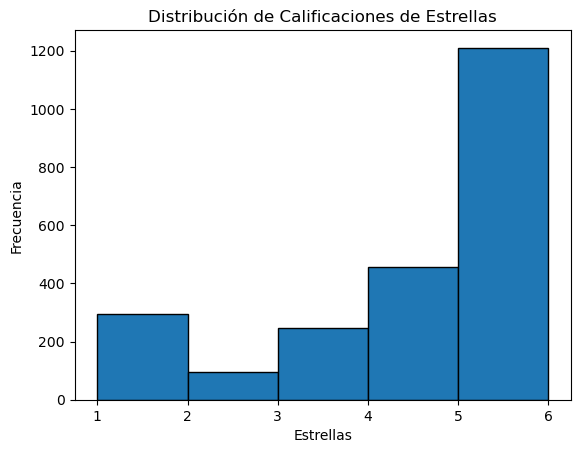

In [33]:
plt.hist(guaguas_df['stars'], bins=range(1, 7), edgecolor='black')
plt.xlabel('Estrellas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones de Estrellas')
plt.show()


#### Análisis Temporal
#### ¿Cómo han cambiado los comentarios positivos o negativos a lo largo del tiempo?

/var/folders/_l/n0zr2f5507b_h55j03vp1tv40000gn/T/ipykernel_32526/3319838333.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time = guaguas_df.resample('M')['sentiment'].mean()


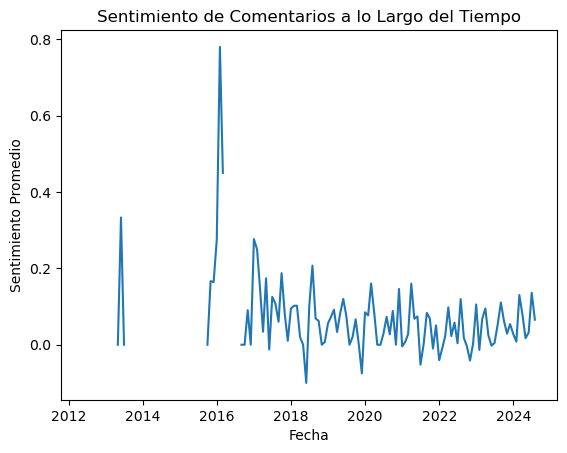

In [36]:
guaguas_df['publishedAtDate'] = pd.to_datetime(guaguas_df['publishedAtDate'])
guaguas_df.set_index('publishedAtDate', inplace=True)
sentiment_over_time = guaguas_df.resample('M')['sentiment'].mean()

plt.plot(sentiment_over_time)
plt.xlabel('Fecha')
plt.ylabel('Sentimiento Promedio')
plt.title('Sentimiento de Comentarios a lo Largo del Tiempo')
plt.show()


#### Comparación entre Locales y No Locales
#### ¿Hay diferencias significativas entre los comentarios de locales y no locales?

In [37]:
local_reviews = guaguas_df[guaguas_df['isLocalGuide']]
non_local_reviews = guaguas_df[~guaguas_df['isLocalGuide']]

local_sentiment = local_reviews['sentiment'].mean()
non_local_sentiment = non_local_reviews['sentiment'].mean()
print(f'Sentimiento promedio de locales: {local_sentiment}')
print(f'Sentimiento promedio de no locales: {non_local_sentiment}')

local_stars = local_reviews['stars'].mean()
non_local_stars = non_local_reviews['stars'].mean()
print(f'Calificación promedio de locales: {local_stars}')
print(f'Calificación promedio de no locales: {non_local_stars}')


Sentimiento promedio de locales: 0.06444510812729248
Sentimiento promedio de no locales: 0.03264741242761809
Calificación promedio de locales: 4.136582430806257
Calificación promedio de no locales: 3.4740973312401886


In [ ]:

# DataFrame de ejemplo con coordenadas y cantidad de comentarios por parada
data = {
    'stop_name': ['Parada 1', 'Parada 2', 'Parada 3'],
    'latitude': [28.4682, 28.4636, 28.4691],
    'longitude': [-16.2546, -16.2622, -16.2514],
    'comment_count': [50, 120, 75]  # Ejemplo de cantidad de comentarios
}
df = pd.DataFrame(data)


### Tranvía
#### Información sobre el scrapping:
* Ubicación: Tenerife, España
* String de búsqueda: "estaciones de tranvia"
* Número Máximo de resultados de la búsqueda: 35 
* Número Máximo de reviews por cada resultado: 50
* Orden: Más Relevantes (Para obtener la mayor cantidad posible de reviews donde "text" no sea nulo)

In [8]:
tranvia_df.shape

(793, 41)

In [9]:
tranvia_df.head()

,title,stars,text,publishedAtDate,likesCount,name,reviewerNumberOfReviews,isLocalGuide,responseFromOwnerDate,responseFromOwnerText,...,reviewerUrl,textTranslated,reviewContext/Plaza de aparcamiento,reviewImageUrls/8,reviewImageUrls/9,reviewImageUrls/10,reviewImageUrls/11,reviewImageUrls/12,reviewImageUrls/13,reviewImageUrls/14
0,Chimisay,5,"Una estación muy bonita, y cómoda si vas por l...",2018-01-13T15:24:43.024Z,0,Germán May,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1155990860...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chimisay,3,Rompen el cristal del monitor que expende los ...,2018-10-14T21:02:35.900Z,0,Heavy Herrera,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1117702933...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chimisay,4,Si quieres bajar hasta Miramar esta es tu esta...,2020-12-05T16:43:13.297Z,0,M L,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1076069361...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chimisay,5,Residencial tranquilo con facilidad en transpo...,2023-08-06T17:05:11.222Z,0,jose V. Montserrat,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1014023221...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chimisay,4,"Es una parada como las demás, bastante limpia ...",2017-06-15T19:01:38.118Z,1,ANA BELEN HERNANDEZ PEREZ,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1139803068...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tranvia_df.describe()

,stars,likesCount,reviewerNumberOfReviews,rating,reviewDetailedRating/Ambiente,reviewDetailedRating/Comida,reviewDetailedRating/Servicio
count,793.000000,793.000000,0.0,0.0,27.000000,25.000000,28.000000
mean,3.849937,0.368222,NaN,NaN,3.370370,3.640000,3.392857
std,1.428048,1.028925,NaN,NaN,1.690429,1.680278,1.707050
min,1.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000
25%,3.000000,0.000000,NaN,NaN,1.500000,2.000000,1.750000
50%,4.000000,0.000000,NaN,NaN,4.000000,4.000000,4.000000
75%,5.000000,0.000000,NaN,NaN,5.000000,5.000000,5.000000
max,5.000000,8.000000,NaN,NaN,5.000000,5.000000,5.000000


### Alquiler de Coche
#### Información sobre el scrapping:
* Ubicación: Tenerife, España
* String de búsqueda: "agencias de alquiler de coche"
* Número Máximo de resultados de la búsqueda: 35 
* Número Máximo de reviews por cada resultado: 50
* Orden: Más Relevantes (Para obtener la mayor cantidad posible de reviews donde "text" no sea nulo)

In [8]:
tranvia_df.shape

(793, 41)

In [9]:
tranvia_df.head()

,title,stars,text,publishedAtDate,likesCount,name,reviewerNumberOfReviews,isLocalGuide,responseFromOwnerDate,responseFromOwnerText,...,reviewerUrl,textTranslated,reviewContext/Plaza de aparcamiento,reviewImageUrls/8,reviewImageUrls/9,reviewImageUrls/10,reviewImageUrls/11,reviewImageUrls/12,reviewImageUrls/13,reviewImageUrls/14
0,Chimisay,5,"Una estación muy bonita, y cómoda si vas por l...",2018-01-13T15:24:43.024Z,0,Germán May,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1155990860...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chimisay,3,Rompen el cristal del monitor que expende los ...,2018-10-14T21:02:35.900Z,0,Heavy Herrera,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1117702933...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chimisay,4,Si quieres bajar hasta Miramar esta es tu esta...,2020-12-05T16:43:13.297Z,0,M L,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1076069361...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chimisay,5,Residencial tranquilo con facilidad en transpo...,2023-08-06T17:05:11.222Z,0,jose V. Montserrat,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1014023221...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chimisay,4,"Es una parada como las demás, bastante limpia ...",2017-06-15T19:01:38.118Z,1,ANA BELEN HERNANDEZ PEREZ,NaN,True,NaN,NaN,...,https://www.google.com/maps/contrib/1139803068...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tranvia_df.describe()

,stars,likesCount,reviewerNumberOfReviews,rating,reviewDetailedRating/Ambiente,reviewDetailedRating/Comida,reviewDetailedRating/Servicio
count,793.000000,793.000000,0.0,0.0,27.000000,25.000000,28.000000
mean,3.849937,0.368222,NaN,NaN,3.370370,3.640000,3.392857
std,1.428048,1.028925,NaN,NaN,1.690429,1.680278,1.707050
min,1.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000
25%,3.000000,0.000000,NaN,NaN,1.500000,2.000000,1.750000
50%,4.000000,0.000000,NaN,NaN,4.000000,4.000000,4.000000
75%,5.000000,0.000000,NaN,NaN,5.000000,5.000000,5.000000
max,5.000000,8.000000,NaN,NaN,5.000000,5.000000,5.000000
